In [335]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
% matplotlib inline
pi = np.pi

In [590]:
def rela1(x,l):
    n = len(x.T)
    t = x
    for i in range(n):
        if i in range(int(np.ceil((n+1-l)/2)), 1+(n-1+l)//2):
            t[0,i]=0
    return t

In [603]:
def rela(x,l):
    n = len(x.T)
    t = x
    for i in range(n-l,n):
        t[0,i]=0
    return t

In [513]:
def DCT_mat(xu):
    n = len(xu.T)
    a = np.zeros(shape=(n,n))
    for i in range(n):
        a[i] = np.cos(np.pi*(2*np.arange(n)+1)*i/(2*n))
    a = 2*a
    return a.dot(xu.reshape(-1,1)).reshape([1,-1])

In [514]:
def IDCT_mat(xu):
    n = len(xu.T)
    a = np.zeros(shape=(n,n))
    for i in range(n):
        p = np.cos(np.pi*(2*np.arange(n)+1)*i/(2*n))/(n)
        a[i] = p
    a[0] = 0.5*a[0]
    a=a.T

    return a.dot(xu.reshape([-1,1])).reshape([1,-1])

In [515]:
def haarMatrix(n):
    # Allow only size n of power 2
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = haarMatrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    normalized = True
    if normalized:
        h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])
    else:
        h_i = np.kron(np.eye(len(h)), [1, -1])
    # combine parts
    h = np.vstack((h_n, h_i))
    return h

In [516]:
def haar_mat(xu):
    n = len(xu.T)
    h = haarMatrix(n)
    return h.dot(xu.reshape([-1,1])).reshape([1,-1])
    

In [517]:
def haar_inv_mat(xu):
    n = len(xu.T)
    h = (haarMatrix(n)/n).transpose()
    return (h.dot(xu.reshape([-1,1]))).reshape([1,-1])

In [518]:
def DFT_mat(x):
    N = len(x.T)
    Wn = np.exp(-2J*np.pi/N)
    l_w = Wn**np.arange(N)
    D = (l_w.reshape(-1,1))**np.arange(N)
    return D.dot(x.reshape([-1,1])).reshape([1,-1])

In [519]:
def IDFT_mat(x):
    N = len(x.T)
    Wn = np.exp(-2J*np.pi/N)
    l_w = Wn**np.arange(0, -N, -1)
    D = (l_w.reshape(-1,1))**np.arange(N)/N
    return D.dot(x.reshape([-1,1])).reshape([1,-1])

In [520]:
def mse(x):
    return (np.sum((x**2)/len(x.T)))

In [521]:
def diff(x,y):
    return(x-y)

C:\software\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


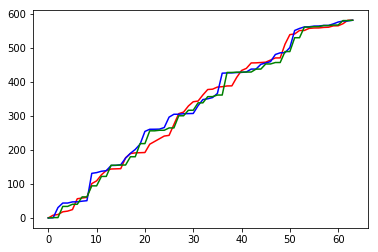

In [606]:
error_dct = []
error_dft = []
error_haar = []

x =np.random.randint(10,size = 64).reshape([1,-1])
y_dct = DCT_mat(x)
y_haar = haar_mat(x)
y_dft = DFT_mat(x)
#plt.plot(y_dft)
#plt.plot(z)
for t in range(64):
    temp_dct = rela(y_dct,t)
    temp_dft = rela1(y_dft,t)
    temp_haar = rela(y_haar,t)
    z_dct = IDCT_mat(temp_dct)
    error_dct.append(mse(diff(z_dct.reshape(-1,1),x.reshape(-1,1))))
    z_dft = IDFT_mat(temp_dft)
    error_dft.append(mse(diff(z_dft.reshape(-1,1),x.reshape(-1,1))))
    z_haar = haar_inv_mat(temp_haar)
    error_haar.append(mse(diff(z_haar.reshape(-1,1),x.reshape(-1,1))))

plt.plot(error_haar,'r')
plt.plot(error_dct,'b')
plt.plot(error_dft,'g')

